<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 - Character Generator Model (Problem 2)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [ ]:
# Import the Required Packages
# Enter your code here:
from tensorflow import keras
print('keras: ', keras.__version__)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.4.0


### GitHub + Colab

In [ ]:
#run for GitHub Colab
!git clone "https://github.com/OldManSteve/DL_Assg2.git"


Cloning into 'DL_Assg2'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 51 (delta 15), reused 42 (delta 9), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [ ]:
#GitHub Colab directory
# Directories for files
holmes_file = '/content/DL_Assg2/holmes.txt'

In [ ]:
#Google drive model upload/save storage
from google.colab import drive
drive.mount('/content/drive')

model_path='/content/drive/My Drive/Colab Notebooks/DL_Assg2_Models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [ ]:
# read in the text file, transforming everything to lower case
text = open(holmes_file).read().lower()
print('The original text has ' + str(len(text)) + ' characters.\n')

The original text has 562422 characters.



### 1.2 Data Processing


In [ ]:
### print out the first 1000 characters of the raw text to get a sense of what characters to remove
text[:2000]

"\ufeffthe adventures of sherlock holmes by sir arthur conan doyle\n\n   i. a scandal in bohemia\n  ii. the red-headed league\n iii. a case of identity\n  iv. the boscombe valley mystery\n   v. the five orange pips\n  vi. the man with the twisted lip\n vii. the adventure of the blue carbuncle\nviii. the adventure of the speckled band\n  ix. the adventure of the engineer's thumb\n   x. the adventure of the noble bachelor\n  xi. the adventure of the beryl coronet\n xii. the adventure of the copper beeches\n\n\nadventure i. a scandal in bohemia\n\ni.\n\nto sherlock holmes she is always the woman. i have seldom heard\nhim mention her under any other name. in his eyes she eclipses\nand predominates the whole of her sex. it was not that he felt\nany emotion akin to love for irene adler. all emotions, and that\none particularly, were abhorrent to his cold, precise but\nadmirably balanced mind. he was, i take it, the most perfect\nreasoning and observing machine that the world has seen, but as

In [ ]:
# remove all '\n' and '\r' from text
text = text.replace('\n','') 
text = text.replace('\r','')

print(text[:2000])

﻿the adventures of sherlock holmes by sir arthur conan doyle   i. a scandal in bohemia  ii. the red-headed league iii. a case of identity  iv. the boscombe valley mystery   v. the five orange pips  vi. the man with the twisted lip vii. the adventure of the blue carbuncleviii. the adventure of the speckled band  ix. the adventure of the engineer's thumb   x. the adventure of the noble bachelor  xi. the adventure of the beryl coronet xii. the adventure of the copper beechesadventure i. a scandal in bohemiai.to sherlock holmes she is always the woman. i have seldom heardhim mention her under any other name. in his eyes she eclipsesand predominates the whole of her sex. it was not that he feltany emotion akin to love for irene adler. all emotions, and thatone particularly, were abhorrent to his cold, precise butadmirably balanced mind. he was, i take it, the most perfectreasoning and observing machine that the world has seen, but as alover he would have placed himself in a false position. 

In [ ]:
# create a function 'clean_text' to clean text so that only the following letters and punctation remain
def clean_text(text):
    punctuation = ['!', ',', '.', ':', ';', '?', '-', "'",' ']
    letters='abcdefghijklmnopqrstuvwxyz'
    
    # Enter your code here:
    clean_text=''

    for i in text:
      if i in punctuation or i in letters:
        clean_text+=i

    return clean_text

In [ ]:
# clean data using clean_text function
text = clean_text(text)
text[:2000]

"the adventures of sherlock holmes by sir arthur conan doyle   i. a scandal in bohemia  ii. the red-headed league iii. a case of identity  iv. the boscombe valley mystery   v. the five orange pips  vi. the man with the twisted lip vii. the adventure of the blue carbuncleviii. the adventure of the speckled band  ix. the adventure of the engineer's thumb   x. the adventure of the noble bachelor  xi. the adventure of the beryl coronet xii. the adventure of the copper beechesadventure i. a scandal in bohemiai.to sherlock holmes she is always the woman. i have seldom heardhim mention her under any other name. in his eyes she eclipsesand predominates the whole of her sex. it was not that he feltany emotion akin to love for irene adler. all emotions, and thatone particularly, were abhorrent to his cold, precise butadmirably balanced mind. he was, i take it, the most perfectreasoning and observing machine that the world has seen, but as alover he would have placed himself in a false position. 

In [ ]:
# count the number of unique characters in the text
chars = sorted(list(set(text)))

# print some of the text, as well as statistics
print ("This document has " +  str(len(text)) + " total number of characters.")
print ("This document has " +  str(len(chars)) + " unique characters.")

This document has 544340 total number of characters.
This document has 35 unique characters.


In [ ]:
# create a function 'generate_text_io' to generate text inputs based on window_size and the corresponding labels
def generate_text_io(text, window_size):
    inputs = [] # store inputs
    labels = [] # stores label
    
    # Enter your code here:
    for i in range(0, len(text)-window_size):
      inputs.append(text[i:i+window_size])
      labels.append(text[i+window_size])
    
    print("Num of Sequences: ",len(inputs))
    print(inputs)
    return inputs, labels

In [ ]:
# this dictionary is a function mapping each unique character to a unique integer
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # map each unique character to unique integer

# this dictionary is a function mapping each unique integer back to a unique character
indices_to_chars = dict((i, c) for i, c in enumerate(chars))  # map each unique integer back to unique character

In [ ]:
import numpy as np

# create a function 'encode_io_pairs' to perform one-hot encoding of inputs and labels
def encode_io_pairs(text,window_size): # window_size determines # of characters in each input
    
    # Enter your code here:
    inputs, labels = generate_text_io(text, window_size)


    # Next, one-hot encode the characters into binary arrays.
    print('Vectorization...')
    x = np.zeros((len(inputs), window_size, len(chars)), dtype=np.bool)
    y = np.zeros((len(inputs), len(chars)), dtype=np.bool)
    for i, sentence in enumerate(inputs):
        for t, char in enumerate(sentence):
            x[i, t, chars_to_indices[char]] = 1
        y[i, chars_to_indices[labels[i]]] = 1

    return x, y

In [ ]:
# perform one-hot encoding of inputs and labels
window_size = 100
X, y = encode_io_pairs(text, window_size)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### 1.3 Splitting Dataset into Inputs (X) and Labels (y)

In [ ]:
# Note: You may choose to perform this step before encoding the data (step 1.2).
# Enter your code here:
print (y.shape)
print (X.shape)

(544240, 35)
(544240, 100, 35)


## Step 2 – Develop a Character Generator Model

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #1 (Replicate as necessary for other models)

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(window_size, len(chars)))) #multiclass single label classification
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               83968     
_________________________________________________________________
dense (Dense)                (None, 35)                4515      
Total params: 88,483
Trainable params: 88,483
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01), metrics=['acc'])

history = model.fit(X, y,
                    epochs=30,
                    batch_size=128) 

Epoch 1/30
  92/4252 [..............................] - ETA: 19:05 - loss: 2.7630 - acc: 0.2216

KeyboardInterrupt: ignored

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('chgen_model_1.h5')

### Model #2 (Model 1 15e)

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(window_size, len(chars)))) #multiclass single label classification
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               83968     
_________________________________________________________________
dense (Dense)                (None, 35)                4515      
Total params: 88,483
Trainable params: 88,483
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01), metrics=['acc'])

history = model.fit(X, y,
                    epochs=15,
                    batch_size=128) 

Epoch 1/15
4252/4252 [==============================] - 104s 24ms/step - loss: 1.7489 - acc: 0.4853
Epoch 2/15
4252/4252 [==============================] - 104s 24ms/step - loss: 1.5314 - acc: 0.5466
Epoch 3/15
4252/4252 [==============================] - 103s 24ms/step - loss: 1.4809 - acc: 0.5598
Epoch 4/15
4252/4252 [==============================] - 104s 24ms/step - loss: 1.4549 - acc: 0.5672
Epoch 5/15
4252/4252 [==============================] - 105s 25ms/step - loss: 1.4369 - acc: 0.5714
Epoch 6/15
4252/4252 [==============================] - 105s 25ms/step - loss: 1.4230 - acc: 0.5754
Epoch 7/15
4252/4252 [==============================] - 104s 24ms/step - loss: 1.4128 - acc: 0.5785
Epoch 8/15
4252/4252 [==============================] - 104s 25ms/step - loss: 1.4052 - acc: 0.5802
Epoch 9/15
4252/4252 [==============================] - 104s 24ms/step - loss: 1.3983 - acc: 0.5824
Epoch 10/15
4252/4252 [==============================] - 104s 24ms/step - loss: 1.3928 - acc: 0.5839

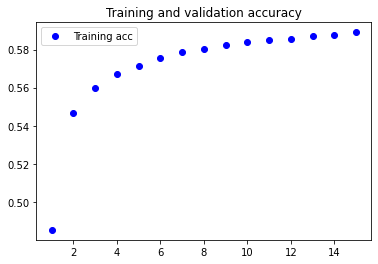

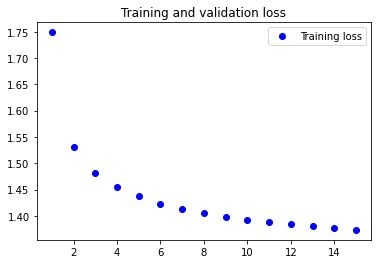

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_2.h5')
model.save('chgen_model_2.h5')

### Model #3

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(window_size, len(chars)))) #multiclass single label classification
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               83968     
_________________________________________________________________
dense_1 (Dense)              (None, 35)                4515      
Total params: 88,483
Trainable params: 88,483
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

history = model.fit(X, y,
                    epochs=500,
                    batch_size=128) 

Epoch 1/500
6/6 [==============================] - 0s 5ms/step - loss: 1.2133 - acc: 0.6096
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0061 - acc: 0.6784
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 0.8257 - acc: 0.7544
Epoch 4/500
6/6 [==============================] - 0s 4ms/step - loss: 0.7198 - acc: 0.7895
Epoch 5/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6065 - acc: 0.8348
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 0.5097 - acc: 0.8699
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4399 - acc: 0.8816
Epoch 8/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3820 - acc: 0.9079
Epoch 9/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3426 - acc: 0.9167
Epoch 10/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3093 - acc: 0.9211
Epoch 11/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2693 

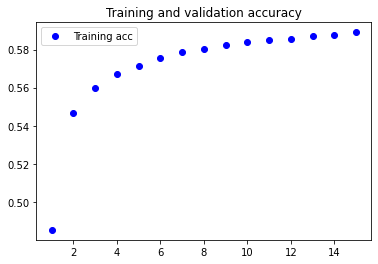

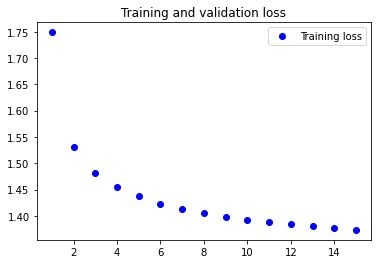

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_3.h5')
model.save('chgen_model_3.h5')

### Model #3_1 (3e)

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(window_size, len(chars)))) #multiclass single label classification
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 128)               83968     
_________________________________________________________________
dense_23 (Dense)             (None, 35)                4515      
Total params: 88,483
Trainable params: 88,483
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

history = model.fit(X, y,
                    epochs=25,
                    batch_size=128) 

Epoch 1/25
1/1 [==============================] - 0s 2ms/step - loss: 3.5597 - acc: 0.0088
Epoch 2/25
1/1 [==============================] - 0s 1ms/step - loss: 3.4712 - acc: 0.1930
Epoch 3/25
1/1 [==============================] - 0s 1ms/step - loss: 3.3530 - acc: 0.1930
Epoch 4/25
1/1 [==============================] - 0s 1ms/step - loss: 3.1414 - acc: 0.1930
Epoch 5/25
1/1 [==============================] - 0s 1ms/step - loss: 2.9002 - acc: 0.1930
Epoch 6/25
1/1 [==============================] - 0s 929us/step - loss: 2.9313 - acc: 0.1930
Epoch 7/25
1/1 [==============================] - 0s 967us/step - loss: 2.7178 - acc: 0.1930
Epoch 8/25
1/1 [==============================] - 0s 1ms/step - loss: 2.6955 - acc: 0.3246
Epoch 9/25
1/1 [==============================] - 0s 1ms/step - loss: 2.6644 - acc: 0.2719
Epoch 10/25
1/1 [==============================] - 0s 4ms/step - loss: 2.5685 - acc: 0.3246
Epoch 11/25
1/1 [==============================] - 0s 1ms/step - loss: 2.4325 - acc: 

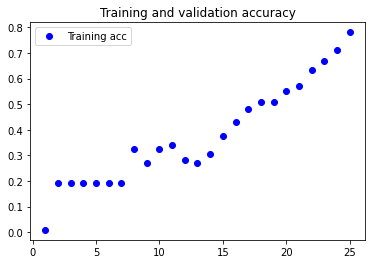

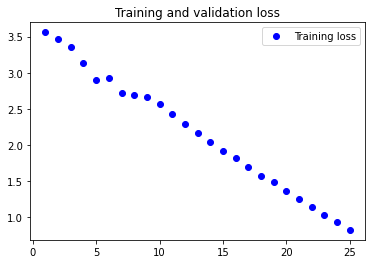

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_3_1.h5')
model.save('chgen_model_3_1.h5')

### Model #4 [GRU]

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.GRU(128, input_shape=(window_size, len(chars)), return_sequences=True)) #multiclass single label classification
model.add(layers.Flatten())
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_17 (GRU)                 (None, 100, 128)          63360     
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 35)                448035    
Total params: 511,395
Trainable params: 511,395
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

history = model.fit(X, y,
                    epochs=25,
                    batch_size=128) 

Epoch 1/25
4252/4252 [==============================] - 32s 8ms/step - loss: 1.9934 - acc: 0.4176
Epoch 2/25
4252/4252 [==============================] - 32s 7ms/step - loss: 1.8202 - acc: 0.4617
Epoch 3/25
4252/4252 [==============================] - 32s 7ms/step - loss: 1.7418 - acc: 0.4832
Epoch 4/25
4252/4252 [==============================] - 32s 7ms/step - loss: 1.6900 - acc: 0.4974
Epoch 5/25
4252/4252 [==============================] - 32s 7ms/step - loss: 1.6484 - acc: 0.5096
Epoch 6/25
4252/4252 [==============================] - 32s 8ms/step - loss: 1.6211 - acc: 0.5163
Epoch 7/25
4252/4252 [==============================] - 31s 7ms/step - loss: 1.5988 - acc: 0.5220
Epoch 8/25
4252/4252 [==============================] - 31s 7ms/step - loss: 1.5896 - acc: 0.5244
Epoch 9/25
4252/4252 [==============================] - 31s 7ms/step - loss: 1.7545 - acc: 0.4814
Epoch 10/25
4252/4252 [==============================] - 31s 7ms/step - loss: 2.7743 - acc: 0.2166
Epoch 11/25
4252/42

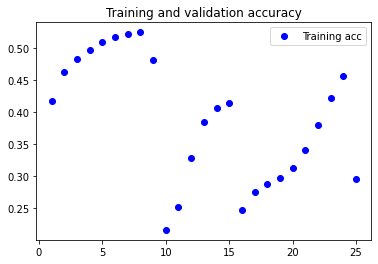

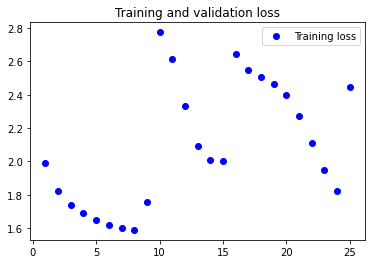

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_4.h5')
model.save('chgen_model_4.h5')

### Model #5 [Conv1D] (not saved)

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.Conv1D(128, 9, input_shape=(window_size, len(chars)), activation='relu')) #multiclass single label classification
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(128, 9, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 92, 128)           40448     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 18, 128)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 10, 128)           147584    
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 35)                4515      
Total params: 192,547
Trainable params: 192,547
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

history = model.fit(X, y,
                    epochs=25,
                    batch_size=128) 

Epoch 1/25
4252/4252 [==============================] - 17s 4ms/step - loss: 2.9400 - acc: 0.1740
Epoch 2/25
4252/4252 [==============================] - 18s 4ms/step - loss: 2.9400 - acc: 0.1740
Epoch 3/25
4252/4252 [==============================] - 18s 4ms/step - loss: 2.9399 - acc: 0.1740
Epoch 4/25
4252/4252 [==============================] - 18s 4ms/step - loss: 2.9399 - acc: 0.1740
Epoch 5/25
4252/4252 [==============================] - 18s 4ms/step - loss: 2.9400 - acc: 0.1740
Epoch 6/25
4252/4252 [==============================] - 18s 4ms/step - loss: 2.9400 - acc: 0.1740
Epoch 7/25
 812/4252 [====>.........................] - ETA: 14s - loss: 2.9458 - acc: 0.1735

KeyboardInterrupt: ignored

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_5.h5')
model.save('chgen_model_5.h5')

### Model #5 [GRU]

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.GRU(256, input_shape=(window_size, len(chars)), return_sequences=True)) #multiclass single label classification
model.add(layers.GRU(256))
model.add(layers.Flatten())
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 100, 256)          225024    
_________________________________________________________________
gru_4 (GRU)                  (None, 256)               394752    
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 35)                8995      
Total params: 628,771
Trainable params: 628,771
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['acc'])

history = model.fit(X, y,
                    epochs=100,
                    batch_size=128) 

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 3.5508 - acc: 0.0960
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 3.5472 - acc: 0.1120
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 3.5436 - acc: 0.1280
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 3.5400 - acc: 0.1680
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 3.5364 - acc: 0.1680
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 3.5328 - acc: 0.1840
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 3.5291 - acc: 0.2000
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 3.5255 - acc: 0.1920
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 3.5218 - acc: 0.1840
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 3.5180 - acc: 0.1840
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 3.5142 

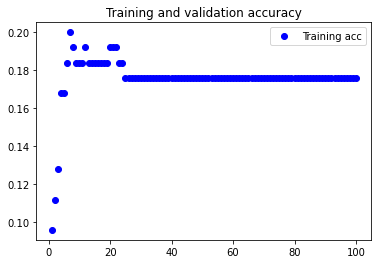

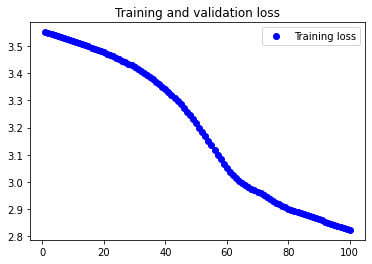

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_5.h5')
model.save('chgen_model_5.h5')

### Model #5_1 [GRU] (50e)

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.GRU(256, input_shape=(window_size, len(chars)), return_sequences=True)) #multiclass single label classification
model.add(layers.GRU(256))
model.add(layers.Flatten())
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, 256)               225024    
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 35)                8995      
Total params: 234,019
Trainable params: 234,019
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['acc'])

history = model.fit(X, y,
                    epochs=50,
                    batch_size=128) 

Epoch 1/50
1/1 [==============================] - 0s 2ms/step - loss: 3.5510 - acc: 0.0480
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.5488 - acc: 0.0480
Epoch 3/50
1/1 [==============================] - 0s 1ms/step - loss: 3.5466 - acc: 0.0480
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 3.5444 - acc: 0.0560
Epoch 5/50
1/1 [==============================] - 0s 1ms/step - loss: 3.5421 - acc: 0.0640
Epoch 6/50
1/1 [==============================] - 0s 1ms/step - loss: 3.5399 - acc: 0.0640
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 3.5377 - acc: 0.0800
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 3.5355 - acc: 0.0720
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 3.5332 - acc: 0.0720
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 3.5310 - acc: 0.0720
Epoch 11/50
1/1 [==============================] - 0s 1ms/step - loss: 3.5287 - acc: 0.07

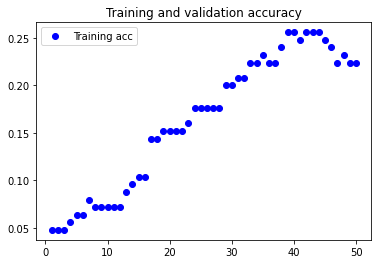

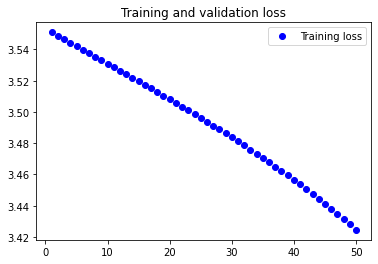

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_5_1.h5')
model.save('chgen_model_5_1.h5')

### Model #5_2 [GRU] 

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.GRU(1024, input_shape=(window_size, len(chars)), return_sequences=True)) #multiclass single label classification
model.add(layers.GRU(1024))
model.add(layers.Flatten())
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, 100, 1024)         3259392   
_________________________________________________________________
gru_9 (GRU)                  (None, 1024)              6297600   
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 35)                35875     
Total params: 9,592,867
Trainable params: 9,592,867
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=2e-5), metrics=['acc'])

history = model.fit(X, y,
                    epochs=500,
                    batch_size=128) 

Epoch 1/500
1/1 [==============================] - 0s 6ms/step - loss: 3.4053 - acc: 0.1760
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 3.4013 - acc: 0.1760
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 3.3973 - acc: 0.1760
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 3.3931 - acc: 0.1760
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 3.3888 - acc: 0.1760
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 3.3845 - acc: 0.1760
Epoch 7/500
1/1 [==============================] - 0s 15ms/step - loss: 3.3800 - acc: 0.1760
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 3.3755 - acc: 0.1760
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 3.3708 - acc: 0.1760
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 3.3661 - acc: 0.1760
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss:

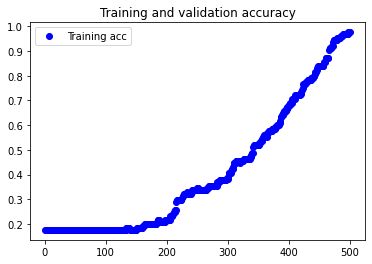

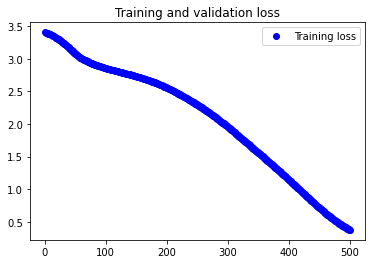

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_5_2.h5')
model.save('chgen_model_5_2.h5')

### Model #5_3 [GRU] (400e)

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.GRU(1024, input_shape=(window_size, len(chars)), return_sequences=True)) #multiclass single label classification
model.add(layers.GRU(1024))
model.add(layers.Flatten())
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 1024)         3259392   
_________________________________________________________________
gru_1 (GRU)                  (None, 1024)              6297600   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 35)                35875     
Total params: 9,592,867
Trainable params: 9,592,867
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=2e-5), metrics=['acc'])

history = model.fit(X, y,
                    epochs=400,
                    batch_size=128) 

Epoch 1/400
1/1 [==============================] - 0s 5ms/step - loss: 3.5545 - acc: 0.0160
Epoch 2/400
1/1 [==============================] - 0s 12ms/step - loss: 3.5524 - acc: 0.0320
Epoch 3/400
1/1 [==============================] - 0s 12ms/step - loss: 3.5502 - acc: 0.0400
Epoch 4/400
1/1 [==============================] - 0s 12ms/step - loss: 3.5481 - acc: 0.0880
Epoch 5/400
1/1 [==============================] - 0s 12ms/step - loss: 3.5459 - acc: 0.1200
Epoch 6/400
1/1 [==============================] - 0s 12ms/step - loss: 3.5437 - acc: 0.1520
Epoch 7/400
1/1 [==============================] - 0s 12ms/step - loss: 3.5415 - acc: 0.1520
Epoch 8/400
1/1 [==============================] - 0s 12ms/step - loss: 3.5392 - acc: 0.1600
Epoch 9/400
1/1 [==============================] - 0s 7ms/step - loss: 3.5370 - acc: 0.1840
Epoch 10/400
1/1 [==============================] - 0s 8ms/step - loss: 3.5348 - acc: 0.2080
Epoch 11/400
1/1 [==============================] - 0s 8ms/step - loss: 

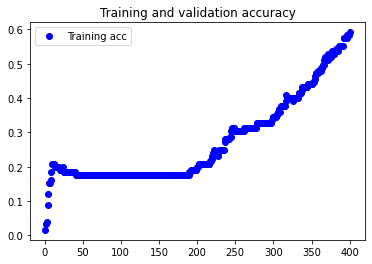

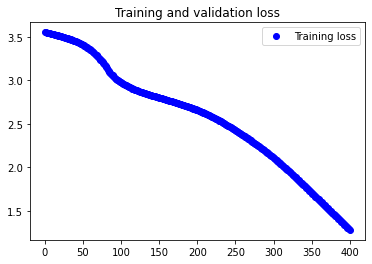

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_5_3.h5')
model.save('chgen_model_5_3.h5')

### Model #6

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.LSTM(1024, input_shape=(window_size, len(chars)))) #multiclass single label classification
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1024)              4341760   
_________________________________________________________________
dense (Dense)                (None, 35)                35875     
Total params: 4,377,635
Trainable params: 4,377,635
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

history = model.fit(X, y,
                    epochs=20,
                    batch_size=128) 

Epoch 1/20
1/1 [==============================] - 0s 7ms/step - loss: 3.5559 - acc: 0.0259
Epoch 2/20
1/1 [==============================] - 0s 7ms/step - loss: 3.2339 - acc: 0.1897
Epoch 3/20
1/1 [==============================] - 0s 7ms/step - loss: 7.8885 - acc: 0.1810
Epoch 4/20
1/1 [==============================] - 0s 6ms/step - loss: 3.1575 - acc: 0.1724
Epoch 5/20
1/1 [==============================] - 0s 6ms/step - loss: 3.1028 - acc: 0.3707
Epoch 6/20
1/1 [==============================] - 0s 6ms/step - loss: 2.8816 - acc: 0.3276
Epoch 7/20
1/1 [==============================] - 0s 6ms/step - loss: 2.6178 - acc: 0.3103
Epoch 8/20
1/1 [==============================] - 0s 6ms/step - loss: 2.3528 - acc: 0.2586
Epoch 9/20
1/1 [==============================] - 0s 7ms/step - loss: 2.2354 - acc: 0.3017
Epoch 10/20
1/1 [==============================] - 0s 7ms/step - loss: 2.1349 - acc: 0.3190
Epoch 11/20
1/1 [==============================] - 0s 7ms/step - loss: 1.9610 - acc: 0.31

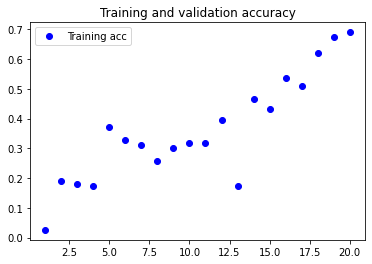

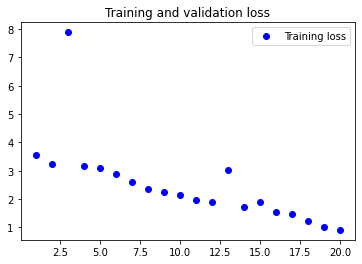

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_6.h5')
model.save('chgen_model_6.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #7

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.LSTM(256, input_shape=(window_size, len(chars)))) #multiclass single label classification
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 256)               299008    
_________________________________________________________________
dense_7 (Dense)              (None, 35)                8995      
Total params: 308,003
Trainable params: 308,003
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

history = model.fit(X, y,
                    epochs=17,
                    batch_size=128) 

Epoch 1/17
1/1 [==============================] - 0s 2ms/step - loss: 3.5536 - acc: 0.0640
Epoch 2/17
1/1 [==============================] - 0s 3ms/step - loss: 3.4088 - acc: 0.2080
Epoch 3/17
1/1 [==============================] - 0s 1ms/step - loss: 3.0872 - acc: 0.1760
Epoch 4/17
1/1 [==============================] - 0s 1ms/step - loss: 3.3258 - acc: 0.1760
Epoch 5/17
1/1 [==============================] - 0s 1ms/step - loss: 2.8174 - acc: 0.1680
Epoch 6/17
1/1 [==============================] - 0s 1ms/step - loss: 2.8723 - acc: 0.2320
Epoch 7/17
1/1 [==============================] - 0s 1ms/step - loss: 2.8899 - acc: 0.2560
Epoch 8/17
1/1 [==============================] - 0s 1ms/step - loss: 2.8208 - acc: 0.2560
Epoch 9/17
1/1 [==============================] - 0s 1ms/step - loss: 2.6965 - acc: 0.2560
Epoch 10/17
1/1 [==============================] - 0s 1ms/step - loss: 2.5714 - acc: 0.2240
Epoch 11/17
1/1 [==============================] - 0s 1ms/step - loss: 2.4859 - acc: 0.24

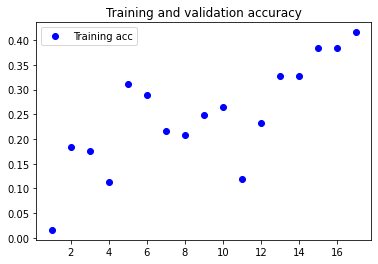

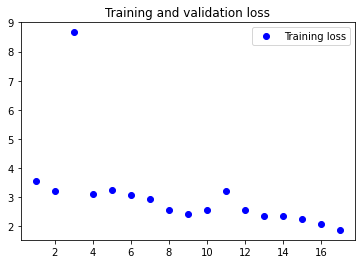

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_7.h5')
model.save('chgen_model_7.h5')

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

### Model #8 (Model 2 GRU 15e)

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = keras.models.Sequential()
model.add(layers.GRU(128, input_shape=(window_size, len(chars)), return_sequences=True)) #multiclass single label classification
model.add(layers.GRU(128))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 100, 128)          63360     
_________________________________________________________________
gru_3 (GRU)                  (None, 128)               99072     
_________________________________________________________________
dense_1 (Dense)              (None, 35)                4515      
Total params: 166,947
Trainable params: 166,947
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01), metrics=['acc'])

history = model.fit(X, y,
                    epochs=15,
                    batch_size=128) 

Epoch 1/15
6/6 [==============================] - 0s 5ms/step - loss: 4.0512 - acc: 0.0848
Epoch 2/15
6/6 [==============================] - 0s 5ms/step - loss: 3.4618 - acc: 0.1199
Epoch 3/15
6/6 [==============================] - 0s 5ms/step - loss: 2.7914 - acc: 0.2091
Epoch 4/15
6/6 [==============================] - 0s 4ms/step - loss: 2.7209 - acc: 0.2368
Epoch 5/15
6/6 [==============================] - 0s 4ms/step - loss: 2.4195 - acc: 0.3114
Epoch 6/15
6/6 [==============================] - 0s 5ms/step - loss: 2.2343 - acc: 0.3406
Epoch 7/15
6/6 [==============================] - 0s 5ms/step - loss: 2.0663 - acc: 0.3845
Epoch 8/15
6/6 [==============================] - 0s 4ms/step - loss: 1.8431 - acc: 0.4605
Epoch 9/15
6/6 [==============================] - 0s 5ms/step - loss: 1.6476 - acc: 0.4912
Epoch 10/15
6/6 [==============================] - 0s 4ms/step - loss: 1.4865 - acc: 0.5322
Epoch 11/15
6/6 [==============================] - 0s 5ms/step - loss: 1.2762 - acc: 0.60

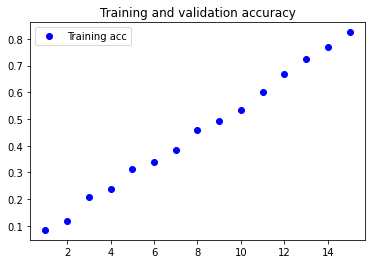

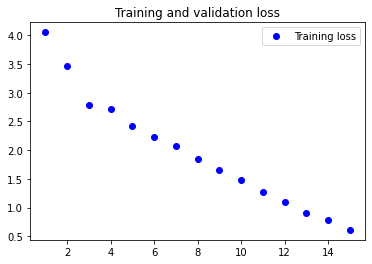

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_8.h5')
model.save('chgen_model_8.h5')

### Model #8_1 (Model 2 GRU 10e)

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = keras.models.Sequential()
model.add(layers.GRU(128, input_shape=(window_size, len(chars)), return_sequences=True)) #multiclass single label classification
model.add(layers.GRU(128))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_14 (GRU)                 (None, 100, 128)          63360     
_________________________________________________________________
gru_15 (GRU)                 (None, 128)               99072     
_________________________________________________________________
dense_7 (Dense)              (None, 35)                4515      
Total params: 166,947
Trainable params: 166,947
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

history = model.fit(X, y,
                    epochs=20,
                    batch_size=128) 

Epoch 1/20
1/1 [==============================] - 0s 2ms/step - loss: 3.5580 - acc: 0.0160
Epoch 2/20
1/1 [==============================] - 0s 1ms/step - loss: 3.3778 - acc: 0.1760
Epoch 3/20
1/1 [==============================] - 0s 1ms/step - loss: 3.0121 - acc: 0.1760
Epoch 4/20
1/1 [==============================] - 0s 1ms/step - loss: 3.7057 - acc: 0.1760
Epoch 5/20
1/1 [==============================] - 0s 1ms/step - loss: 2.9382 - acc: 0.1120
Epoch 6/20
1/1 [==============================] - 0s 2ms/step - loss: 2.9571 - acc: 0.1760
Epoch 7/20
1/1 [==============================] - 0s 1ms/step - loss: 2.9981 - acc: 0.2480
Epoch 8/20
1/1 [==============================] - 0s 1ms/step - loss: 2.9577 - acc: 0.2480
Epoch 9/20
1/1 [==============================] - 0s 1ms/step - loss: 2.8619 - acc: 0.2560
Epoch 10/20
1/1 [==============================] - 0s 1ms/step - loss: 2.7291 - acc: 0.2480
Epoch 11/20
1/1 [==============================] - 0s 1ms/step - loss: 2.5712 - acc: 0.25

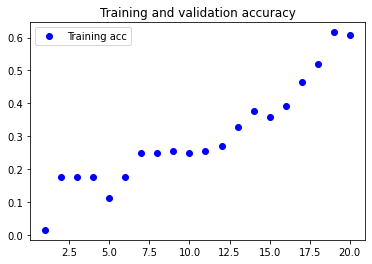

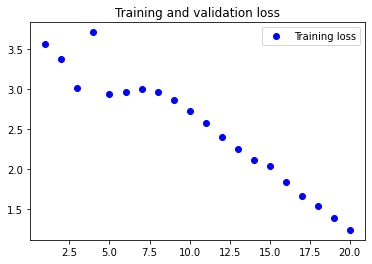

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_8_1.h5')
model.save('chgen_model_8_1.h5')

### Model #9 (not saved)

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.GRU(2048, input_shape=(window_size, len(chars)), return_sequences=True)) #multiclass single label classification
model.add(layers.GRU(2048))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 100, 2048)         12810240  
_________________________________________________________________
gru_3 (GRU)                  (None, 2048)              25178112  
_________________________________________________________________
dense_1 (Dense)              (None, 35)                71715     
Total params: 38,060,067
Trainable params: 38,060,067
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=2e-5), metrics=['acc'])

history = model.fit(X, y,
                    epochs=100,
                    batch_size=2) 

Epoch 1/100
63/63 [==============================] - 3s 46ms/step - loss: 3.5331 - acc: 0.1440
Epoch 2/100
63/63 [==============================] - 3s 45ms/step - loss: 3.4371 - acc: 0.1760
Epoch 3/100
63/63 [==============================] - 3s 44ms/step - loss: 3.1916 - acc: 0.1760
Epoch 4/100
63/63 [==============================] - 3s 44ms/step - loss: 2.9603 - acc: 0.1760
Epoch 5/100
63/63 [==============================] - 3s 44ms/step - loss: 2.8938 - acc: 0.1760
Epoch 6/100
63/63 [==============================] - 3s 44ms/step - loss: 2.8577 - acc: 0.1680
Epoch 7/100
63/63 [==============================] - 3s 44ms/step - loss: 2.8143 - acc: 0.1840
Epoch 8/100
63/63 [==============================] - 3s 44ms/step - loss: 2.7740 - acc: 0.1760
Epoch 9/100
63/63 [==============================] - 3s 43ms/step - loss: 2.7266 - acc: 0.2240
Epoch 10/100
63/63 [==============================] - 3s 44ms/step - loss: 2.7052 - acc: 0.2000
Epoch 11/100
63/63 [=============================

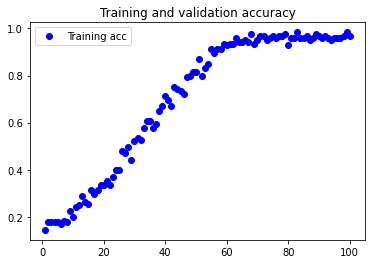

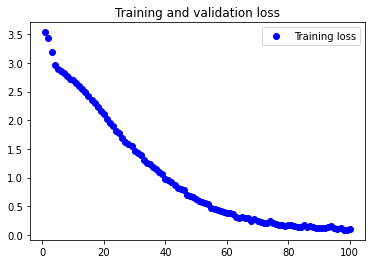

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_9.h5')
model.save('chgen_model_9.h5')

### Model #9 

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.GRU(2048, input_shape=(window_size, len(chars)), return_sequences=True)) #multiclass single label classification
model.add(layers.GRU(2048))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 100, 2048)         12810240  
_________________________________________________________________
gru_7 (GRU)                  (None, 2048)              25178112  
_________________________________________________________________
dense_3 (Dense)              (None, 35)                71715     
Total params: 38,060,067
Trainable params: 38,060,067
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=2e-5), metrics=['acc'])

history = model.fit(X, y,
                    epochs=50,
                    batch_size=2) 

Epoch 1/50
63/63 [==============================] - 3s 45ms/step - loss: 3.5360 - acc: 0.1280
Epoch 2/50
63/63 [==============================] - 3s 43ms/step - loss: 3.4370 - acc: 0.1760
Epoch 3/50
63/63 [==============================] - 3s 43ms/step - loss: 3.1828 - acc: 0.1760
Epoch 4/50
63/63 [==============================] - 3s 43ms/step - loss: 2.9945 - acc: 0.1760
Epoch 5/50
63/63 [==============================] - 3s 43ms/step - loss: 2.9038 - acc: 0.1760
Epoch 6/50
63/63 [==============================] - 3s 43ms/step - loss: 2.8486 - acc: 0.1760
Epoch 7/50
63/63 [==============================] - 3s 43ms/step - loss: 2.8144 - acc: 0.1760
Epoch 8/50
63/63 [==============================] - 3s 43ms/step - loss: 2.7670 - acc: 0.1760
Epoch 9/50
63/63 [==============================] - 3s 43ms/step - loss: 2.7178 - acc: 0.1920
Epoch 10/50
63/63 [==============================] - 3s 43ms/step - loss: 2.6839 - acc: 0.1840
Epoch 11/50
63/63 [==============================] - 3s 43m

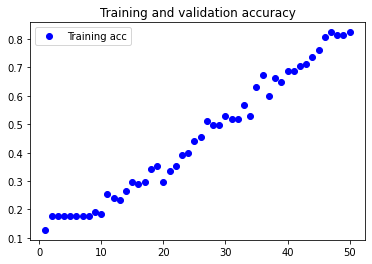

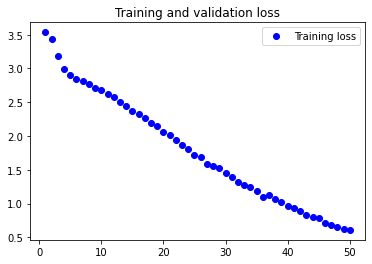

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_9.h5')
model.save('chgen_model_9.h5')

### Model #9_1 (30e) 

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.GRU(2048, input_shape=(window_size, len(chars)), return_sequences=True)) #multiclass single label classification
model.add(layers.GRU(2048))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, 100, 2048)         12810240  
_________________________________________________________________
gru_9 (GRU)                  (None, 2048)              25178112  
_________________________________________________________________
dense_4 (Dense)              (None, 35)                71715     
Total params: 38,060,067
Trainable params: 38,060,067
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=2e-5), metrics=['acc'])

history = model.fit(X, y,
                    epochs=30,
                    batch_size=2) 

Epoch 1/30
63/63 [==============================] - 3s 45ms/step - loss: 3.5351 - acc: 0.1280
Epoch 2/30
63/63 [==============================] - 3s 43ms/step - loss: 3.4373 - acc: 0.1680
Epoch 3/30
63/63 [==============================] - 3s 43ms/step - loss: 3.1739 - acc: 0.1760
Epoch 4/30
63/63 [==============================] - 3s 44ms/step - loss: 2.9688 - acc: 0.1760
Epoch 5/30
63/63 [==============================] - 3s 44ms/step - loss: 2.9007 - acc: 0.1760
Epoch 6/30
63/63 [==============================] - 3s 43ms/step - loss: 2.8657 - acc: 0.2000
Epoch 7/30
63/63 [==============================] - 3s 43ms/step - loss: 2.8133 - acc: 0.1760
Epoch 8/30
63/63 [==============================] - 3s 43ms/step - loss: 2.7815 - acc: 0.1920
Epoch 9/30
63/63 [==============================] - 3s 43ms/step - loss: 2.7304 - acc: 0.1760
Epoch 10/30
63/63 [==============================] - 3s 43ms/step - loss: 2.6949 - acc: 0.1840
Epoch 11/30
63/63 [==============================] - 3s 43m

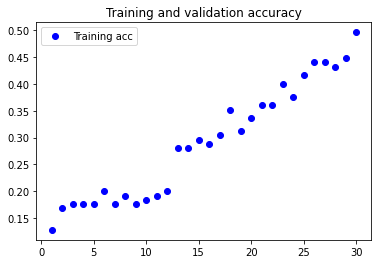

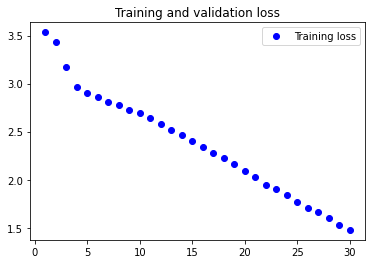

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_9_1.h5')
model.save('chgen_model_9_1.h5')

### Model #10

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.GRU(256, input_shape=(window_size, len(chars)), return_sequences=True)) #multiclass single label classification
model.add(layers.GRU(256))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 256)          225024    
_________________________________________________________________
gru_1 (GRU)                  (None, 256)               394752    
_________________________________________________________________
dense (Dense)                (None, 35)                8995      
Total params: 628,771
Trainable params: 628,771
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['acc'])

history = model.fit(X, y,
                    epochs=10,
                    batch_size=128) 

Epoch 1/10
4252/4252 [==============================] - 114s 27ms/step - loss: 2.3538 - acc: 0.3219
Epoch 2/10
4252/4252 [==============================] - 115s 27ms/step - loss: 2.0286 - acc: 0.4053
Epoch 3/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.8838 - acc: 0.4456
Epoch 4/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.7878 - acc: 0.4720
Epoch 5/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.7137 - acc: 0.4934
Epoch 6/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.6529 - acc: 0.5113
Epoch 7/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.6018 - acc: 0.5265
Epoch 8/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.5586 - acc: 0.5390
Epoch 9/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.5214 - acc: 0.5499
Epoch 10/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.4895 - acc: 0.5584

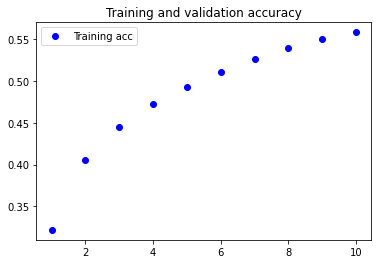

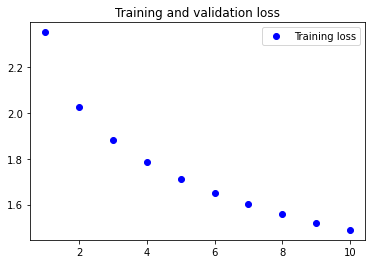

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_10.h5')
model.save('chgen_model_10.h5')

### Model #11

In [ ]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

model = keras.models.Sequential()
model.add(layers.GRU(256, input_shape=(window_size, len(chars)), return_sequences=True)) #multiclass single label classification
model.add(layers.GRU(256))
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 256)          225024    
_________________________________________________________________
gru_1 (GRU)                  (None, 256)               394752    
_________________________________________________________________
dense (Dense)                (None, 35)                8995      
Total params: 628,771
Trainable params: 628,771
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['acc'])

history = model.fit(X, y,
                    epochs=10,
                    batch_size=128) 

Epoch 1/10
4252/4252 [==============================] - 114s 27ms/step - loss: 2.3538 - acc: 0.3219
Epoch 2/10
4252/4252 [==============================] - 115s 27ms/step - loss: 2.0286 - acc: 0.4053
Epoch 3/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.8838 - acc: 0.4456
Epoch 4/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.7878 - acc: 0.4720
Epoch 5/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.7137 - acc: 0.4934
Epoch 6/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.6529 - acc: 0.5113
Epoch 7/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.6018 - acc: 0.5265
Epoch 8/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.5586 - acc: 0.5390
Epoch 9/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.5214 - acc: 0.5499
Epoch 10/10
4252/4252 [==============================] - 115s 27ms/step - loss: 1.4895 - acc: 0.5584

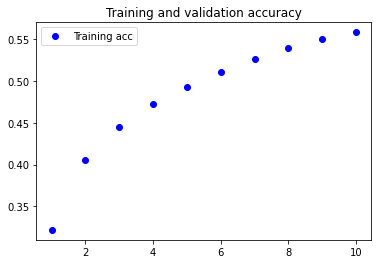

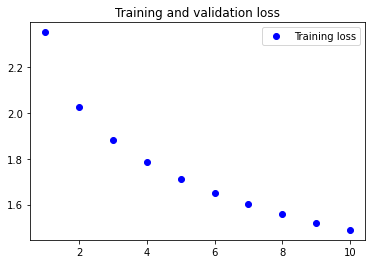

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(model_path+'chgen_model_10.h5')
model.save('chgen_model_10.h5')

## Step Evaluation [chgen_model_2]

In [ ]:
from tensorflow.keras import models

#model.load_weights('chgen_model_best.h5')

model = models.load_model(model_path+'chgen_model_2.h5')

In [ ]:
# takes the user input

#Oh's third victim was hawker stall owner Ng Phek Huay, whom he stole from on Sept 9, 2019.  While Madam Ng, 71, was waiting for her turn to see the doctor at Queenstown Polyclinic, he stole money from her handbag.  He then offered her zopiclone and convinced her that she had to take it before her medical check-up.  Thinking that Oh was one of the polyclinic staff, Madam Ng took the drug and became drowsy.  He then took from her a gold-coloured bracelet which she was wearing and took her out of the polyclinic.  Oh then got a taxi to take Madam Ng to NUH, as she was losing consciousness.  On Friday, District Judge Gwee backdated Oh's sentence to Sept 12 last year, when he was first remanded.

#text_input = np.array([input()])
text_input = clean_text(input().lower())

i love going to the park, especially when it is windy or sunny. every satruday i go to the park after buying ice cream.


In [ ]:
# one-hot encode the user input
# Enter your code here:
new_window_size = 5

X, y = encode_io_pairs(text_input, new_window_size)

Num of Sequences:  114
['i lov', ' love', 'love ', 'ove g', 've go', 'e goi', ' goin', 'going', 'oing ', 'ing t', 'ng to', 'g to ', ' to t', 'to th', 'o the', ' the ', 'the p', 'he pa', 'e par', ' park', 'park,', 'ark, ', 'rk, e', 'k, es', ', esp', ' espe', 'espec', 'speci', 'pecia', 'ecial', 'ciall', 'ially', 'ally ', 'lly w', 'ly wh', 'y whe', ' when', 'when ', 'hen i', 'en it', 'n it ', ' it i', 'it is', 't is ', ' is w', 'is wi', 's win', ' wind', 'windy', 'indy ', 'ndy o', 'dy or', 'y or ', ' or s', 'or su', 'r sun', ' sunn', 'sunny', 'unny.', 'nny. ', 'ny. e', 'y. ev', '. eve', ' ever', 'every', 'very ', 'ery s', 'ry sa', 'y sat', ' satr', 'satru', 'atrud', 'truda', 'ruday', 'uday ', 'day i', 'ay i ', 'y i g', ' i go', 'i go ', ' go t', 'go to', 'o to ', ' to t', 'to th', 'o the', ' the ', 'the p', 'he pa', 'e par', ' park', 'park ', 'ark a', 'rk af', 'k aft', ' afte', 'after', 'fter ', 'ter b', 'er bu', 'r buy', ' buyi', 'buyin', 'uying', 'ying ', 'ing i', 'ng ic', 'g ice', ' ic

In [ ]:
# show the model output using predict function
# Enter your code here:
import random
import sys
import numpy as np

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
  

for epoch in range(1, 5):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    model.fit(X, y,
              batch_size=128,
              epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text_input) - new_window_size - 1)
    generated_text = text_input[start_index: start_index + new_window_size]
    print('--- Generating with seed: "' + generated_text + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, new_window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, chars_to_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


epoch 1
1/1 [==============================] - 0s 2ms/step - loss: 1.9713 - acc: 0.4474
--- Generating with seed: "ndy o"
------ temperature: 0.2
ndy oWARNING:tensorflow:Model was constructed with shape (None, 100, 35) for input Tensor("lstm_1_input:0", shape=(None, 100, 35), dtype=float32), but it was called on an input with incompatible shape (None, 5, 35).
f the passion an another of the would to the singully and the depended the street to the back to seemed to the side the countinal to the probert to himselves and and so concenty and the beece in the companing the chair with the street of the beece to the county were to the said the stone of the state three and and the street the laid the street and the man which to the street and the singully and 
------ temperature: 0.5
 and the fronts with to the asked at reasone farm that in the though with the very with had before of the little the stone of the singully sat in another of the centry our from the any face to the part into the lo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


ange
------ temperature: 1.0
 angel, and she respecriced. becamerigles a post convitiled, behind thisit and angly which a tream any bestme. it was some cut.a rail at the in the has eming his little mannerby movely at the hround where is hardire its holling. then, grief which whitfleamp in the silve ofour, cross and police to me?ut'traint nook and with the with used one liever cab, antboar very future came horrolled. sitcould to th
------ temperature: 1.2
to the grin'tiffound to sets, for engam painingun sharp inhisinscotneply unimbrelmud comen questucle itcoul forgedf stively his love offor both itit with the live whenngurbororsome only withbanesen's chair. prefearth. was heavy beoke-th's ceptive.now-sshu notany later, 'gosnownoral.i sat but wamates, earning, and where a young itfacche pircount one. behind foaralw! that it wils fo.it was where alst.'id
epoch 2
1/1 [==============================] - 0s 1ms/step - loss: 1.6212 - acc: 0.5088
--- Generating with seed: "y. ev"
------ temper

In [ ]:
model.fit(X, y, batch_size=128, epochs=1)

text_input = input("Enter sentence to predict next character: \n")
temperature = 0.2
print('------ temperature:', temperature)
print("Prediction: ")
sys.stdout.write(text_input)

# We generate 400 characters
# for i in range(400):
sampled = np.zeros((1, len(text_input), len(chars)))
for t, char in enumerate(text_input):
    sampled[0, t, chars_to_indices[char]] = 1.

preds = model.predict(sampled, verbose=0)[0]
next_index = sample(preds, temperature)
next_char = chars[next_index]

text_input += next_char
text_input = text_input[1:]


sys.stdout.write(next_char)
sys.stdout.flush()
print()

1/1 [==============================] - 0s 1ms/step - loss: 1.0243 - acc: 0.6930
Enter sentence to predict next character: 
frogs are grea
------ temperature: 0.2
Prediction: 
frogs are greaWARNING:tensorflow:Model was constructed with shape (None, 100, 35) for input Tensor("lstm_1_input_1:0", shape=(None, 100, 35), dtype=float32), but it was called on an input with incompatible shape (None, 14, 35).
t


## Step Evaluation [chgen_model_2] (play ard)

In [ ]:
from tensorflow.keras import models

#model.load_weights('chgen_model_best.h5')

model = models.load_model(model_path+'chgen_model_2.h5')

In [ ]:
# takes the user input

#Oh's third victim was hawker stall owner Ng Phek Huay, whom he stole from on Sept 9, 2019.  While Madam Ng, 71, was waiting for her turn to see the doctor at Queenstown Polyclinic, he stole money from her handbag.  He then offered her zopiclone and convinced her that she had to take it before her medical check-up.  Thinking that Oh was one of the polyclinic staff, Madam Ng took the drug and became drowsy.  He then took from her a gold-coloured bracelet which she was wearing and took her out of the polyclinic.  Oh then got a taxi to take Madam Ng to NUH, as she was losing consciousness.  On Friday, District Judge Gwee backdated Oh's sentence to Sept 12 last year, when he was first remanded.

#text_input = np.array([input()])
text_input = clean_text(input().lower())

Oh's third victim was hawker stall owner Ng Phek Huay, whom he stole from on Sept 9, 2019.  While Madam Ng, 71, was waiting for her turn to see the doctor at Queenstown Polyclinic, he stole money from her handbag.  He then offered her zopiclone and convinced her that she had to take it before her medical check-up.  Thinking that Oh was one of the polyclinic staff, Madam Ng took the drug and became drowsy.  He then took from her a gold-coloured bracelet which she was wearing and took her out of the polyclinic.  Oh then got a taxi to take Madam Ng to NUH, as she was losing consciousness.  On Friday, District Judge Gwee backdated Oh's sentence to Sept 12 last year, when he was first remanded.


In [ ]:
# one-hot encode the user input
# Enter your code here:
new_window_size = 10

X, y = encode_io_pairs(text_input, new_window_size)

Num of Sequences:  679
["oh's third", "h's third ", "'s third v", 's third vi', ' third vic', 'third vict', 'hird victi', 'ird victim', 'rd victim ', 'd victim w', ' victim wa', 'victim was', 'ictim was ', 'ctim was h', 'tim was ha', 'im was haw', 'm was hawk', ' was hawke', 'was hawker', 'as hawker ', 's hawker s', ' hawker st', 'hawker sta', 'awker stal', 'wker stall', 'ker stall ', 'er stall o', 'r stall ow', ' stall own', 'stall owne', 'tall owner', 'all owner ', 'll owner n', 'l owner ng', ' owner ng ', 'owner ng p', 'wner ng ph', 'ner ng phe', 'er ng phek', 'r ng phek ', ' ng phek h', 'ng phek hu', 'g phek hua', ' phek huay', 'phek huay,', 'hek huay, ', 'ek huay, w', 'k huay, wh', ' huay, who', 'huay, whom', 'uay, whom ', 'ay, whom h', 'y, whom he', ', whom he ', ' whom he s', 'whom he st', 'hom he sto', 'om he stol', 'm he stole', ' he stole ', 'he stole f', 'e stole fr', ' stole fro', 'stole from', 'tole from ', 'ole from o', 'le from on', 'e from on ', ' from on s', 'from on s

In [ ]:
# show the model output using predict function
# Enter your code here:
import random
import sys
import numpy as np

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
  

for epoch in range(1, 5):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    model.fit(X, y,
              batch_size=128,
              epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text_input) - new_window_size - 1)
    generated_text = text_input[start_index: start_index + new_window_size]
    print('--- Generating with seed: "' + generated_text + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, new_window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, chars_to_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


epoch 1
6/6 [==============================] - 0s 4ms/step - loss: 1.9983 - acc: 0.4536
--- Generating with seed: " at queens"
------ temperature: 0.2
 at queensWARNING:tensorflow:Model was constructed with shape (None, 100, 35) for input Tensor("lstm_1_input:0", shape=(None, 100, 35), dtype=float32), but it was called on an input with incompatible shape (None, 10, 35).
 were an old park and the reason that i was a street was a silence of the police to the police to the room was a street, and the matter to the police the state of the police to him. i have a little last man when i have heard of the state of the police the man when i have the police to the other was a single of the police to the police to the corner to the police to me to the police to the police t
------ temperature: 0.5
e police to the police was done when i call the coroner of the side situated when he was charge. i shall see the cream, all the door would be eyes inthe case man, mr. holmes, and have mered crime and to

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


 the police the child from her characte
------ temperature: 1.0
r character of my pertain from wit, what part of mad of the police. fromroha could corroy bag of her johner stants briming . my oyoueia until and safted. 'sexaygen as i understandac, my can there endy to the coroner upon the ull of, youheard to put to passe you'll dohat to her own. her watched thens glance road nore latelyswere bull, certainly upon round front of natural keenmins, and over-year rather, usit
------ temperature: 1.2
ther, usit are at mely, upon you.i as lane.night.successed upon the de until he homet, holmes, the imale lined now, in bag park ovatme men icess by holmes--fur. his lacc are. hg present k, asedou ow. as you womer was aboups.what outwhichis, asthink that he alt to the billerbrinuanstrengcrosehuphed and dowlud-focked upon me cut, and is only to whit? which is move at mables.vanisitoe? i soile doubt that missm
epoch 3
6/6 [==============================] - 0s 4ms/step - loss: 1.3534 - acc: 0.6053
--

In [ ]:
model.fit(X, y, batch_size=128, epochs=1)

text_input = input("Enter sentence to predict next character: \n")
temperature = 0.2
print('------ temperature:', temperature)
print("Prediction: ")
sys.stdout.write(text_input)

# We generate 400 characters
# for i in range(400):
sampled = np.zeros((1, len(text_input), len(chars)))
for t, char in enumerate(text_input):
    sampled[0, t, chars_to_indices[char]] = 1.

preds = model.predict(sampled, verbose=0)[0]
next_index = sample(preds, temperature)
next_char = chars[next_index]

text_input += next_char
text_input = text_input[1:]


sys.stdout.write(next_char)
sys.stdout.flush()
print()

1/1 [==============================] - 0s 2ms/step - loss: 1.1338 - acc: 0.6491
Enter sentence to predict next character: 
please ente
------ temperature: 0.2
Prediction: 
please enter


## Step Evaluation [chgen_model_3_1]

In [ ]:
from tensorflow.keras import models

#model.load_weights('chgen_model_best.h5')

model = models.load_model(model_path+'chgen_model_3_1.h5')

In [ ]:
# takes the user input

#Oh's third victim was hawker stall owner Ng Phek Huay, whom he stole from on Sept 9, 2019.  While Madam Ng, 71, was waiting for her turn to see the doctor at Queenstown Polyclinic, he stole money from her handbag.  He then offered her zopiclone and convinced her that she had to take it before her medical check-up.  Thinking that Oh was one of the polyclinic staff, Madam Ng took the drug and became drowsy.  He then took from her a gold-coloured bracelet which she was wearing and took her out of the polyclinic.  Oh then got a taxi to take Madam Ng to NUH, as she was losing consciousness.  On Friday, District Judge Gwee backdated Oh's sentence to Sept 12 last year, when he was first remanded.

#text_input = np.array([input()])
text_input = clean_text(input().lower())

i love going to the park, especially when it is windy or sunny. every satruday i go to the park after buying ice cream.


In [ ]:
# one-hot encode the user input
# Enter your code here:
new_window_size = 5

X, y = encode_io_pairs(text_input, new_window_size)

Num of Sequences:  114
['i lov', ' love', 'love ', 'ove g', 've go', 'e goi', ' goin', 'going', 'oing ', 'ing t', 'ng to', 'g to ', ' to t', 'to th', 'o the', ' the ', 'the p', 'he pa', 'e par', ' park', 'park,', 'ark, ', 'rk, e', 'k, es', ', esp', ' espe', 'espec', 'speci', 'pecia', 'ecial', 'ciall', 'ially', 'ally ', 'lly w', 'ly wh', 'y whe', ' when', 'when ', 'hen i', 'en it', 'n it ', ' it i', 'it is', 't is ', ' is w', 'is wi', 's win', ' wind', 'windy', 'indy ', 'ndy o', 'dy or', 'y or ', ' or s', 'or su', 'r sun', ' sunn', 'sunny', 'unny.', 'nny. ', 'ny. e', 'y. ev', '. eve', ' ever', 'every', 'very ', 'ery s', 'ry sa', 'y sat', ' satr', 'satru', 'atrud', 'truda', 'ruday', 'uday ', 'day i', 'ay i ', 'y i g', ' i go', 'i go ', ' go t', 'go to', 'o to ', ' to t', 'to th', 'o the', ' the ', 'the p', 'he pa', 'e par', ' park', 'park ', 'ark a', 'rk af', 'k aft', ' afte', 'after', 'fter ', 'ter b', 'er bu', 'r buy', ' buyi', 'buyin', 'uying', 'ying ', 'ing i', 'ng ic', 'g ice', ' ic

In [ ]:
# show the model output using predict function
# Enter your code here:
import random
import sys
import numpy as np

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
  

for epoch in range(1, 5):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    model.fit(X, y,
              batch_size=128,
              epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text_input) - new_window_size - 1)
    generated_text = text_input[start_index: start_index + new_window_size]
    print('--- Generating with seed: "' + generated_text + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, new_window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, chars_to_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


epoch 1
1/1 [==============================] - 0s 2ms/step - loss: 0.7314 - acc: 0.7982
--- Generating with seed: "buyin"
------ temperature: 0.2
g oo t  tpeeraaaa    rssuuddy i  ooen   resuuyy. ieer  aatr  aatr  aatr  aatr  aunn   eesrcaddy.  reesuyidn o  et praa    rssuuddy i  ooon   tehpea r a ttheeaar    ssunddy   resuuyydi g  otth  aerr aat   wesnny..eeerraaat   wenny  eeruyay  r ssunddy   rssuuddy i  oo st uudyi   ooh t tepaaal g  ht ppear  a the park,aeseeaid    issnnid.e  rruuny i eo tu  yy seeruday   gesnn y.eeerraaat   wenny  eerr
------ temperature: 0.5
 eerruaay  g ent  aehr  ttthebaa    rsuunyi ieoo    ohes trauua gi go to the park after baungg  t tppaaa    esunny. eerrua t  wpwnni  eo ru ty  eersuayy. eeer aaat,  eeeccaalm.wweynii ooo t  tpehaa     hepurr   sshuddy  irest udyyi rooot  theppark after buyngg gt ts budyg i tto whh   tespbadd     sshuddi i  oo tt  paerk attehaba  g gno o t othe  arru as  ndysir nittoe aa k aeepr aaa  g  sunny. eeerraaa
------ temperature: 1.0

In [ ]:
model.fit(X, y, batch_size=128, epochs=1)

text_input = input("Enter sentence to predict next character: \n")
temperature = 0.2
print('------ temperature:', temperature)
print("Prediction: ")
sys.stdout.write(text_input)

# We generate 400 characters
# for i in range(400):
sampled = np.zeros((1, len(text_input), len(chars)))
for t, char in enumerate(text_input):
    sampled[0, t, chars_to_indices[char]] = 1.

preds = model.predict(sampled, verbose=0)[0]
next_index = sample(preds, temperature)
next_char = chars[next_index]

text_input += next_char
text_input = text_input[1:]


sys.stdout.write(next_char)
sys.stdout.flush()
print()

1/1 [==============================] - 0s 2ms/step - loss: 0.4162 - acc: 0.9561
Enter sentence to predict next character: 
frogs are grea
------ temperature: 0.2
Prediction: 
frogs are greaWARNING:tensorflow:Model was constructed with shape (None, 100, 35) for input Tensor("lstm_8_input:0", shape=(None, 100, 35), dtype=float32), but it was called on an input with incompatible shape (None, 14, 35).
t


## Step Evaluation [chgen_model_8]

In [ ]:
from tensorflow.keras import models

#model.load_weights('chgen_model_best.h5')

model = models.load_model(model_path+'chgen_model_8.h5')

In [ ]:
# takes the user input

#Oh's third victim was hawker stall owner Ng Phek Huay, whom he stole from on Sept 9, 2019.  While Madam Ng, 71, was waiting for her turn to see the doctor at Queenstown Polyclinic, he stole money from her handbag.  He then offered her zopiclone and convinced her that she had to take it before her medical check-up.  Thinking that Oh was one of the polyclinic staff, Madam Ng took the drug and became drowsy.  He then took from her a gold-coloured bracelet which she was wearing and took her out of the polyclinic.  Oh then got a taxi to take Madam Ng to NUH, as she was losing consciousness.  On Friday, District Judge Gwee backdated Oh's sentence to Sept 12 last year, when he was first remanded.

#text_input = np.array([input()])
text_input = clean_text(input().lower())

i love going to the park, especially when it is windy or sunny. every satruday i go to the park after buying ice cream.


In [ ]:
# one-hot encode the user input
# Enter your code here:
new_window_size = 5

X, y = encode_io_pairs(text_input, new_window_size)

Num of Sequences:  114
['i lov', ' love', 'love ', 'ove g', 've go', 'e goi', ' goin', 'going', 'oing ', 'ing t', 'ng to', 'g to ', ' to t', 'to th', 'o the', ' the ', 'the p', 'he pa', 'e par', ' park', 'park,', 'ark, ', 'rk, e', 'k, es', ', esp', ' espe', 'espec', 'speci', 'pecia', 'ecial', 'ciall', 'ially', 'ally ', 'lly w', 'ly wh', 'y whe', ' when', 'when ', 'hen i', 'en it', 'n it ', ' it i', 'it is', 't is ', ' is w', 'is wi', 's win', ' wind', 'windy', 'indy ', 'ndy o', 'dy or', 'y or ', ' or s', 'or su', 'r sun', ' sunn', 'sunny', 'unny.', 'nny. ', 'ny. e', 'y. ev', '. eve', ' ever', 'every', 'very ', 'ery s', 'ry sa', 'y sat', ' satr', 'satru', 'atrud', 'truda', 'ruday', 'uday ', 'day i', 'ay i ', 'y i g', ' i go', 'i go ', ' go t', 'go to', 'o to ', ' to t', 'to th', 'o the', ' the ', 'the p', 'he pa', 'e par', ' park', 'park ', 'ark a', 'rk af', 'k aft', ' afte', 'after', 'fter ', 'ter b', 'er bu', 'r buy', ' buyi', 'buyin', 'uying', 'ying ', 'ing i', 'ng ic', 'g ice', ' ic

In [ ]:
# show the model output using predict function
# Enter your code here:
import random
import sys
import numpy as np

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
  

for epoch in range(1, 5):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    model.fit(X, y,
              batch_size=128,
              epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text_input) - new_window_size - 1)
    generated_text = text_input[start_index: start_index + new_window_size]
    print('--- Generating with seed: "' + generated_text + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, new_window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, chars_to_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


epoch 1
1/1 [==============================] - 0s 4ms/step - loss: 4.1366 - acc: 0.1754
--- Generating with seed: "windy"
------ temperature: 0.2
 ag she whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe was waering agd her burengbacedated bucadacelot  he the porycliricamice mo the poticloce to the porycliricam cerictjjddgoctor her the ponyclori to the poot he backdere-v-coroured bracelet whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe whe 
------ temperature: 0.5
 whe when he whe whe whe whe whe whe whe whe whe whe whe whe whe whene to the po tole to the poryylinicastame ag the ponyyliring acaste wasenge toenbecadockered-vacor the potvinc droctor hure bracelet whe whe was seeto whe whe whe whe whe whe was waering ang to the pooy aring agdacedat romate madam ng to the poot he brucedactre phe the po to phe pheck-up. , he stoof or her bure ardatad to the popyclini
------ temperature: 1.0

In [ ]:
model.fit(X, y, batch_size=128, epochs=1)

text_input = input("Enter sentence to predict next character: \n")
temperature = 0.2
print('------ temperature:', temperature)
print("Prediction: ")
sys.stdout.write(text_input)

# We generate 400 characters
# for i in range(400):
sampled = np.zeros((1, len(text_input), len(chars)))
for t, char in enumerate(text_input):
    sampled[0, t, chars_to_indices[char]] = 1.

preds = model.predict(sampled, verbose=0)[0]
next_index = sample(preds, temperature)
next_char = chars[next_index]

text_input += next_char
text_input = text_input[1:]


sys.stdout.write(next_char)
sys.stdout.flush()
print()

1/1 [==============================] - 0s 8ms/step - loss: 0.5019 - acc: 0.8947
Enter sentence to predict next character: 
frogs are grea
------ temperature: 0.2
Prediction: 
frogs are greaWARNING:tensorflow:Model was constructed with shape (None, 100, 35) for input Tensor("gru_2_input:0", shape=(None, 100, 35), dtype=float32), but it was called on an input with incompatible shape (None, 14, 35).
y


## Step Evaluation [chgen_model_10]

In [ ]:
from tensorflow.keras import models


#model.load_weights('chgen_model_best.h5')
model = models.load_model(model_path+'chgen_model_10.h5')

In [ ]:
# takes the user input

#text_input = np.array([input()])
text_input = clean_text(input().lower())

Oh's third victim was hawker stall owner Ng Phek Huay, whom he stole from on Sept 9, 2019.  While Madam Ng, 71, was waiting for her turn to see the doctor at Queenstown Polyclinic, he stole money from her handbag.  He then offered her zopiclone and convinced her that she had to take it before her medical check-up.  Thinking that Oh was one of the polyclinic staff, Madam Ng took the drug and became drowsy.  He then took from her a gold-coloured bracelet which she was wearing and took her out of the polyclinic.  Oh then got a taxi to take Madam Ng to NUH, as she was losing consciousness.  On Friday, District Judge Gwee backdated Oh's sentence to Sept 12 last year, when he was first remanded.


In [ ]:
# one-hot encode the user input
# Enter your code here:
new_window_size = 10

X, y = encode_io_pairs(text_input, new_window_size)

Num of Sequences:  679
["oh's third", "h's third ", "'s third v", 's third vi', ' third vic', 'third vict', 'hird victi', 'ird victim', 'rd victim ', 'd victim w', ' victim wa', 'victim was', 'ictim was ', 'ctim was h', 'tim was ha', 'im was haw', 'm was hawk', ' was hawke', 'was hawker', 'as hawker ', 's hawker s', ' hawker st', 'hawker sta', 'awker stal', 'wker stall', 'ker stall ', 'er stall o', 'r stall ow', ' stall own', 'stall owne', 'tall owner', 'all owner ', 'll owner n', 'l owner ng', ' owner ng ', 'owner ng p', 'wner ng ph', 'ner ng phe', 'er ng phek', 'r ng phek ', ' ng phek h', 'ng phek hu', 'g phek hua', ' phek huay', 'phek huay,', 'hek huay, ', 'ek huay, w', 'k huay, wh', ' huay, who', 'huay, whom', 'uay, whom ', 'ay, whom h', 'y, whom he', ', whom he ', ' whom he s', 'whom he st', 'hom he sto', 'om he stol', 'm he stole', ' he stole ', 'he stole f', 'e stole fr', ' stole fro', 'stole from', 'tole from ', 'ole from o', 'le from on', 'e from on ', ' from on s', 'from on s

In [ ]:
# show the model output using predict function
# Enter your code here:
import random
import sys
import numpy as np

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
  

for epoch in range(1, 5):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    model.fit(X, y,
              batch_size=128,
              epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text_input) - new_window_size - 1)
    generated_text = text_input[start_index: start_index + new_window_size]
    print('--- Generating with seed: "' + generated_text + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, new_window_size, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, chars_to_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


epoch 1
6/6 [==============================] - 0s 7ms/step - loss: 2.0153 - acc: 0.4404
--- Generating with seed: "am ng took"
------ temperature: 0.2
am ng tookWARNING:tensorflow:Model was constructed with shape (None, 100, 35) for input Tensor("gru_input_1:0", shape=(None, 100, 35), dtype=float32), but it was called on an input with incompatible shape (None, 10, 35).
 a start and the street of the street of the secret the companion of the strange and have been street of the state and the dear from the coroner to me that he was a shall of the secret the street and the dear which i have been street. i have not be a little the lady with his face and the from the companion which he see that i am some of the strange of the coroner was a sure that was the concent a 
------ temperature: 0.5
concent a put upon the componition as the face and the gland. left he had been at the back so the fire at the did at the pater of the police we shall double and was done that he has had been as he was a 

In [ ]:
model.fit(X, y, batch_size=128, epochs=1)

text_input = input("Enter sentence to predict next character: \n")
temperature = 0.2
print('------ temperature:', temperature)
print("Prediction: ")
sys.stdout.write(text_input)

# We generate 400 characters
# for i in range(400):
sampled = np.zeros((1, len(text_input), len(chars)))
for t, char in enumerate(text_input):
    sampled[0, t, chars_to_indices[char]] = 1.

preds = model.predict(sampled, verbose=0)[0]
next_index = sample(preds, temperature)
next_char = chars[next_index]

text_input += next_char
text_input = text_input[1:]


sys.stdout.write(next_char)
sys.stdout.flush()
print()

#dogs are great
#such a beaute
#please enter
#i would love to (th-e __)

6/6 [==============================] - 0s 8ms/step - loss: 1.5995 - acc: 0.5493
Enter sentence to predict next character: 
please ente
------ temperature: 0.2
Prediction: 
please enter


## Step 3 – Use the Best Model to make prediction

In [ ]:
from tensorflow.keras import models

model = models.load_model(model_path+ 'chgen_model_best.h5')

In [ ]:
# takes the user input

#text_input = np.array([input()])
text_input = clean_text(input().lower())

In [ ]:
# one-hot encode the user input
# Enter your code here:
new_window_size = 5

X, y = encode_io_pairs(text_input, new_window_size)

In [ ]:
# show the model output using predict function
# Enter your code here:
import random
import sys
import numpy as np

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
  
#sequences = tokenizer.texts_to_sequences(text_input)
#data = pad_sequences(sequences, maxlen=max_len)

for epoch in range(1, 5):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    model.fit(X, y,
              batch_size=128,
              epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text_input) - window_size - 1)
    generated_text = text_input[start_index: start_index + window_size]
    print('--- Generating with seed: "' + generated_text + '"')

    #for temperature in [0.2, 0.5, 1.0, 1.2]:
        #print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, window_size, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, chars_to_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
        print()


In [ ]:
model.fit(X, y, batch_size=128, epochs=1)

text_input = input("Enter sentence to predict next character: \n")
temperature = 0.2
print('------ temperature:', temperature)
print("Prediction: ")
sys.stdout.write(text_input)

# We generate 400 characters
# for i in range(400):
sampled = np.zeros((1, len(text_input), len(chars)))
for t, char in enumerate(text_input):
    sampled[0, t, chars_to_indices[char]] = 1.

preds = model.predict(sampled, verbose=0)[0]
next_index = sample(preds, temperature)
next_char = chars[next_index]

text_input += next_char
text_input = text_input[1:]


sys.stdout.write(next_char)
sys.stdout.flush()
print()